In [220]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

Prior: (naturalness)
$$prior(\boldsymbol{a}|M,R)=(\frac{1}{\sqrt{2\pi}R})^{M+1}exp(-\frac{\boldsymbol{a}^2}{2R^2})

$$

In [221]:
def prior(a,M,R):
    constant = np.power(1 / (np.sqrt(2 * np.pi) * R), M + 1)
    exp_part = np.exp(-np.dot(a,a) / (2 * np.power(R, 2)))
    return constant * exp_part

generate data from function $g(x)=(\frac{1}{2}+tan(\frac{\pi}{2}x))^2$(which is precise value)  
with relative error of each 'experimental points' being constant $c$  
the number of mesh (or $x$ points) $N$

In [222]:
def g(x):
    return (0.5 + np.tan(np.pi * x / 2))**2

c=0.05
N=10

generate mesh $x$ within domain $D_2=[0,\frac{2}{\pi}]$, $N$ points  

In [223]:
x=np.linspace(2/np.pi/10,2/np.pi,N)
print('x:')
print(x)
print('x*pi/2:')
print(x*np.pi/2)

x:
[0.06366198 0.12732395 0.19098593 0.25464791 0.31830989 0.38197186
 0.44563384 0.50929582 0.5729578  0.63661977]
x*pi/2:
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


eta is used to generate 'experiment data' (virtually), which follows a normal distribution, for each data point there is a corresponding $\sigma_{\eta_i}$    
$\sigma_{\eta}=1,\bar{\eta}=0$, $\eta \sim N(0,\sigma_\eta)$  
then generate 'data points' by $y(x_i)=g(x_i)(1+c\eta_i)$  
and $\sigma_i=cy(x_i)$

In [224]:
sigma_eta=1
eta=np.random.normal(0,sigma_eta,N)
y=g(x)*(1+c*eta)
sigma=c*y
#-----------------------------------
print('y:')
print(y)
print('sigma:')
print(sigma)

y:
[0.37858561 0.44346144 0.73924375 0.84198847 1.08727169 1.38148114
 1.73130257 2.18524019 3.08717757 4.33462749]
sigma:
[0.01892928 0.02217307 0.03696219 0.04209942 0.05436358 0.06907406
 0.08656513 0.10926201 0.15435888 0.21673137]


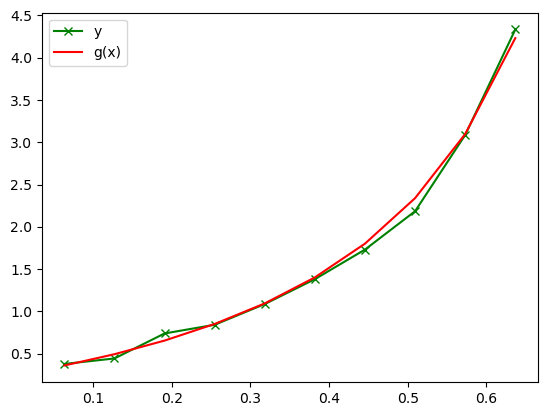

In [225]:
plt.plot(x,y,'gx-',label='y')
plt.plot(x,g(x),'r-',label='g(x)')
plt.legend()

plt.show()

order of polynominal $M$  
sample parameter($M+1$ rows, $N_{par}$ columns)  
$Npar$ parameters for each $a_i$  
$R$: standard deviation parameter in the prior

In [226]:
M=3
Npar=10
R=5
# params=[]
# for _ in range(M+1):
#     param_values=np.linspace(-5,5,Npar)
#     params.append(param_values)

# params = np.array(params)
def generate_samples(M, R, num_samples):
    # Generate samples from the Gaussian distribution
    samples = np.random.normal(0, R, size=(M+1, num_samples))
    
    return samples
    
params=generate_samples(M, R, Npar)
print('params:')
print(params)

params:
[[-2.63795827e+00 -1.04287606e+00 -3.85290012e+00  4.17041810e-01
   2.86919983e+00 -3.54839587e+00 -8.81213034e+00 -3.95914113e+00
  -2.21702804e+00  5.56878201e+00]
 [-7.65874662e+00 -9.96690502e-01  4.80706012e+00  2.61199841e+00
   3.46040245e+00 -1.63321523e+00  2.87121791e+00  6.24386874e-01
  -1.16982619e+01 -7.75721713e+00]
 [-7.34678442e+00  7.78547184e+00  5.26062611e+00 -3.02083580e+00
   1.36394648e+00  3.80296883e+00  2.60783310e+00 -1.15130101e-01
  -2.78531649e+00  8.09263463e+00]
 [ 1.95419955e+00  3.96098138e-01 -8.36061431e-01  3.62344632e+00
   1.12667151e+01  6.76136245e+00 -6.53188824e+00 -1.00622466e+01
  -4.18333508e+00 -6.44811360e-03]]


define polynominal function  
chi square: $\chi^2=\sum_{i} \frac{(y_i-f_i)^2}{\sigma_i} $  
likelihood: $p(D|\alpha)=exp(-\frac{1}{2}\chi^2)$

In [227]:
#def polynomial function
def polynomial(para,x):
    return np.polyval(para,x)

#def chi-square function
def chi_square(y, f, sigma):
    return np.sum(((y-f)**2)/sigma**2)

#def likelyhood function
def likelihood(y, f, sigma):
    chi_sq = chi_square(y, f, sigma)
    return np.exp(-0.5 * chi_sq)
    

create an empty likelihood array

In [228]:
likelihoods = np.zeros((Npar,) * (M+1))
posterior = np.zeros((Npar,) * (M+1))
print(likelihoods.shape)

(10, 10, 10, 10)


Create a zero parameter array

In [229]:

para=np.zeros(M+1)
print(para.shape)
print(para)

(4,)
[0. 0. 0. 0.]


 遍历所有参数的组合  
 选择参数  
 计算模型的预测值  
 计算似然函数值  

In [230]:

for index in itertools.product(range(Npar), repeat=M+1):
    
    for i in range(params.shape[0]):
        para[i]=params[i,index[i]]
   # para = params[:, index]
    
    f = polynomial(para, x)
    
    likelihoods[index] = likelihood(y, f, sigma)
    posterior[index] = likelihoods[index] * prior(para, M, R)
    
    print(posterior[index])

print(posterior.max()) 

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.611090441615411e-261
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.52636762560514e-298
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.131497605663907e-94
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.1147119846414855e-304
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.055869562842999e-220
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.700746655184669e-111
0.0
7.413094465229392e-183
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0523115947494236e-293
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
